<a href="https://colab.research.google.com/github/handsomekiwi/JupyterPractice/blob/master/ML_course_HW/Y2019%20HW9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D
import os  

In [0]:
def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys()  

In [0]:
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  

In [0]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

In [0]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

In [0]:
np.random.seed(10)

In [0]:
#Cifra-10 有50000筆training data 10000筆testing data 32*32的彩色圖片 共10類
(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data()


In [0]:
# normalize and onehot
x_train_normalize=x_train_image.astype('float32')/255.0
x_test_normalize=x_test_image.astype('float32')/255.0  


y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

In [0]:

#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

In [47]:
#show the model
model.summary()  
print("") 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
__________

In [0]:
#dense 4096*1024+1024 
#dense 1024*1024+1024 
#dense 1024*10+10

In [49]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 1.6193 - acc: 0.4069 - val_loss: 1.2495 - val_acc: 0.5566
Epoch 2/10
 - 8s - loss: 1.1891 - acc: 0.5729 - val_loss: 1.0723 - val_acc: 0.6215
Epoch 3/10
 - 8s - loss: 1.0510 - acc: 0.6288 - val_loss: 0.9822 - val_acc: 0.6564
Epoch 4/10
 - 8s - loss: 0.9326 - acc: 0.6721 - val_loss: 0.8882 - val_acc: 0.6956
Epoch 5/10
 - 8s - loss: 0.8450 - acc: 0.7007 - val_loss: 0.8382 - val_acc: 0.7030
Epoch 6/10
 - 8s - loss: 0.7697 - acc: 0.7276 - val_loss: 0.8361 - val_acc: 0.7136
Epoch 7/10
 - 8s - loss: 0.6889 - acc: 0.7570 - val_loss: 0.8263 - val_acc: 0.7155
Epoch 8/10
 - 8s - loss: 0.6298 - acc: 0.7751 - val_loss: 0.8035 - val_acc: 0.7314
Epoch 9/10
 - 8s - loss: 0.5663 - acc: 0.7981 - val_loss: 0.7975 - val_acc: 0.7362
Epoch 10/10
 - 8s - loss: 0.5046 - acc: 0.8165 - val_loss: 0.8216 - val_acc: 0.7339


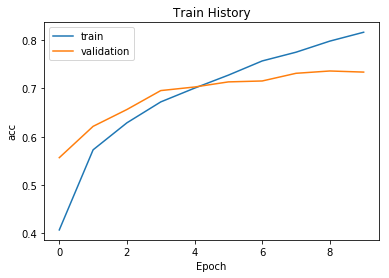

In [50]:
show_train_history(train_history, 'acc', 'val_acc')

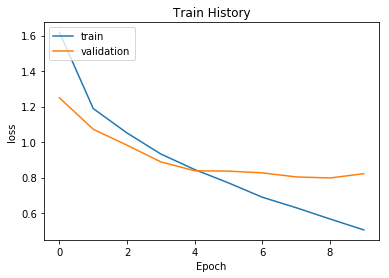

In [51]:
show_train_history(train_history, 'loss', 'val_loss')

In [52]:
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

10000/10000 [==============================] - 1s 127us/step

	[Info] Accuracy of testing data = 72.5%


In [0]:
#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 1.6651 - acc: 0.3881 - val_loss: 1.3655 - val_acc: 0.5020
Epoch 2/10
 - 5s - loss: 1.2665 - acc: 0.5478 - val_loss: 1.1447 - val_acc: 0.5981
Epoch 3/10
 - 5s - loss: 1.1148 - acc: 0.6026 - val_loss: 1.0130 - val_acc: 0.6438
Epoch 4/10
 - 6s - loss: 1.0066 - acc: 0.6421 - val_loss: 0.9721 - val_acc: 0.6687
Epoch 5/10
 - 5s - loss: 0.9195 - acc: 0.6782 - val_loss: 0.9212 - val_acc: 0.6788
Epoch 6/10
 - 5s - loss: 0.8360 - acc: 0.7051 - val_loss: 0.8549 - val_acc: 0.7049
Epoch 7/10
 - 5s - loss: 0.7701 - acc: 0.7283 - val_loss: 0.8364 - val_acc: 0.7072
Epoch 8/10
 - 5s - loss: 0.7003 - acc: 0.7530 - val_loss: 0.8047 - val_acc: 0.7246
Epoch 9/10
 - 6s - loss: 0.6479 - acc: 0.7688 - val_loss: 0.7943 - val_acc: 0.7273
Epoch 10/10
 - 5s - loss: 0.6033 - acc: 0.7849 - val_loss: 0.8128 - val_acc: 0.7182


In [59]:
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))# 後面filter樹沒增加，準確率越小 

10000/10000 [==============================] - 1s 114us/step

	[Info] Accuracy of testing data = 71.1%


In [0]:
#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 padding='same',                
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 11s - loss: 1.7261 - acc: 0.3617 - val_loss: 1.4059 - val_acc: 0.5006
Epoch 2/15
 - 9s - loss: 1.3227 - acc: 0.5228 - val_loss: 1.1390 - val_acc: 0.5990
Epoch 3/15
 - 9s - loss: 1.1438 - acc: 0.5883 - val_loss: 1.0238 - val_acc: 0.6374
Epoch 4/15
 - 9s - loss: 1.0366 - acc: 0.6313 - val_loss: 0.9824 - val_acc: 0.6455
Epoch 5/15
 - 9s - loss: 0.9453 - acc: 0.6624 - val_loss: 0.8533 - val_acc: 0.7031
Epoch 6/15
 - 9s - loss: 0.8664 - acc: 0.6923 - val_loss: 0.8654 - val_acc: 0.6938
Epoch 7/15
 - 9s - loss: 0.8159 - acc: 0.7100 - val_loss: 0.8090 - val_acc: 0.7174
Epoch 8/15
 - 9s - loss: 0.7711 - acc: 0.7244 - val_loss: 0.7453 - val_acc: 0.7390
Epoch 9/15
 - 9s - loss: 0.7159 - acc: 0.7471 - val_loss: 0.7713 - val_acc: 0.7298
Epoch 10/15
 - 9s - loss: 0.6788 - acc: 0.7586 - val_loss: 0.7373 - val_acc: 0.7452
Epoch 11/15
 - 9s - loss: 0.6392 - acc: 0.7718 - val_loss: 0.7074 - val_acc: 0.7535
Epoch 12/15
 - 9s - loss: 0.6048 -

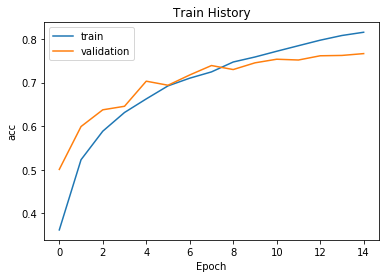

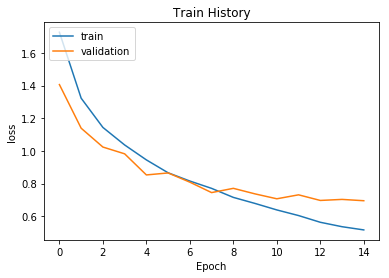

10000/10000 [==============================] - 1s 125us/step

	[Info] Accuracy of testing data = 75.9%


In [81]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=15, batch_size=128,verbose=2)
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

In [0]:
# 原始72.5
#Dropout增減有影響 epoch 不是越多越好
# 後面filter數沒增加，準確率越小
#多增加convolution 有助於model解析特徵